In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Figura 3.1

Hacemos el problema de 2 cuerpos y calculamos el error segun el time step

In [2]:
G = 6.674*10**-11  # Unidades N*m^2/kg^2
eps = 0.05      #softening 
N = 2

e = 0.017     # excentricidad de la orbita
a = 1.496*10**11        # semieje mayor
p = a*(1-e)     #distancia al pericentro

m = np.array([2*10**30, 6*10**24]) #masas

mu = G *(m[0]+m[1])
nn = np.sqrt(mu/a**3)

vp = nn * a * np.sqrt((1+e)/(1-e)) #velocidad en el pericentro
# vp=0.
print vp/1000

apo = a*(1+e)
b = a * np.sqrt(1-e**2)
print b, a

30.382721393468877
149578381237.93158 1.496e+11


In [3]:
#periodo
T = 2*pi/nn
print T


31467954.114104185


In [4]:
#posiciones y velocidades iniciales

pos = np.array([[0.,0.,0.],[p,0.,0.]])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


[[0.000000e+00 0.000000e+00 0.000000e+00]
 [1.470568e+11 0.000000e+00 0.000000e+00]]


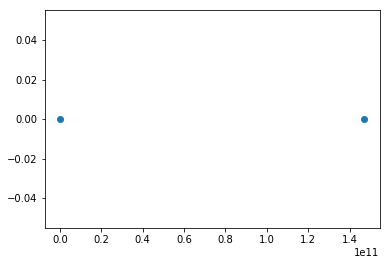

In [5]:
print pos
plt.plot(pos[:,0],pos[:,1],'o')

In [6]:
#NOTA: EN integradores_modificados.f90 están las subrutinas que calculan:
#-----> aceleraciones: aceleracion(eps,m,x,y,z,n,ax,ay,az)
#-----> integrador tipo EULER: euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)
#-----> Integrador tipo RUNGEKUTTA: rungek(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)
#-----> Integrador tipo leapfrog KDK: kickdkick(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)
#-----> Integrador tipo leapfrog DKD: driftkdrift(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)


In [7]:
#################################
#Aca calculamos las aceleraciones con fortran
from integradorespdc import *
ax,ay,az = integradores_modificado.aceleracion(eps,m,pos[:,0],pos[:,1],pos[:,2])

ImportError: /lib64/libc.so.6: version `GLIBC_2.14' not found (required by ./integradorespdc.so)

### Acá definimos el paso y el numero de pasos

In [8]:
tiempo = 100*3.15*10**7
dt = [1*10**-6.5, 1*10**-6, 1*10**-5.5, 1*10**5., 1*10**-4.5, 1*10**-4., 1*10**-3, 1*10**-2.5, 1*10**-2]  #pasos
nit = tiempo/dt[0] #numero de pasos

# EULER

In [11]:
from integradorespdc import *
# from testsinparalelo import *
integradores_modificado.euler(eps,dt[0],nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)
    


(array([0.000000e+00, 1.470568e+11], dtype=float32),
 array([0., 0.], dtype=float32),
 array([0., 0.], dtype=float32),
 array([0., 0.], dtype=float32),
 array([    0.  , 30382.72], dtype=float32),
 array([0., 0.], dtype=float32),
 array([ 1.1927473e-03, -3.9758246e+02], dtype=float32),
 array([0., 0.], dtype=float32),
 array([0., 0.], dtype=float32))

In [10]:
path = '/home/omarioni/mn2/_data/cap3/'
N=2
posf = np.loadtxt(path+'pos_0.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_0.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

IOError: /home/omarioni/mn2/_data/cap3/pos_0.dat not found.

In [ ]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=1)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
# ax.plot(xf[-1,1],yf[-1,1],'.b')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [ ]:
from energia import *
eps=0.9
e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [ ]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

In [ ]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(-1,1)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [ ]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

#### Vamos a integrar la ec diferencial (3.24) del libro con los diferentes integradores.

In [2]:
def f(x,y):
    f = np.sqrt(x + y/4.)
    return f


In [3]:
x1 = 1.
y1 = 1.
x2 = 2.
dx = x2 - x1


#### Euler

In [8]:
y2 = y1 + f(x1,y1)*dx

print y2

2.118033988749895


#### Runge - Kutta de 2º orden

In [27]:
h = dx

k1 = f(x1, y1)
k2 = f(x1+h, y1 + k1*h)
y2 = y1 + h*(k1+k2)/2.
print  y2


2.354238425359342


#### Método del punto medio o Euler modificado (así esta en el libro)

In [28]:
h = dx

k1 = h*f(x1, y1)
y2 = y1 + h*f(x1 + h/2., y1 + k1/2.)
print  y2

2.3746833266588117


#### Runge - Kutta de 4º orden

In [10]:
k1 = f(x1, y1)
k2 = f(x1 + dx*0.5, y1 + k1*dx*0.5)
k3 = f(x1 + dx*0.5, y1 + k2*dx*0.5)
k4 = f(x1 + dx, y1 + k3*dx)
    
y2 = y1 + dx*(k1/6. + k2/3. + k3/3. + k4/6.)

print y2    

2.3752325972431034
